In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/crop_recommendation/train_set_label.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/crop_recommendation/test_set_label.csv")


In [3]:
train_data.head()

,N,P,K,temperature,humidity,ph,rainfall,crop
0,17.0,136.0,196.0,23.871923,90.499390,5.882156,103.054809,apple
1,49.0,69.0,82.0,18.315615,15.361435,7.263119,81.787105,chickpea
2,74.0,49.0,38.0,23.314104,71.450905,7.488014,164.497037,jute
3,104.0,35.0,28.0,27.510061,50.666872,6.983732,143.995555,coffee
4,23.0,72.0,84.0,19.020613,17.131591,6.920251,79.926981,chickpea


In [4]:
test_data.head()

,N,P,K,temperature,humidity,ph,rainfall
0,22.00000,51.00000,16.000000,27.965837,61.349001,8.639586,70.104721
1,130.20691,59.20691,18.586179,25.123987,82.356124,6.707583,91.431992
2,28.00000,27.00000,34.000000,32.454653,50.696938,6.526654,95.048716
3,40.00000,61.00000,22.000000,20.949818,65.810876,7.002216,44.239130
4,28.00000,46.00000,16.000000,29.008124,84.960894,6.664188,45.910114


In [5]:
train_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
N,1650.0,NaN,NaN,NaN,50.370308,36.743966,0.0,21.0,37.0,84.738202,136.0
P,1650.0,NaN,NaN,NaN,53.419241,33.320501,5.0,27.0,52.0,68.0,145.0
K,1650.0,NaN,NaN,NaN,48.111081,50.537044,5.0,20.552276,31.575398,49.0,205.0
temperature,1650.0,NaN,NaN,NaN,25.647214,5.005005,9.46796,22.807269,25.65698,28.529953,42.936054
humidity,1650.0,NaN,NaN,NaN,71.563115,22.19813,14.27328,60.120113,80.547206,90.003702,99.981876
ph,1650.0,NaN,NaN,NaN,6.485583,0.765865,3.525366,5.98616,6.426118,6.924943,9.935091
rainfall,1650.0,NaN,NaN,NaN,103.965778,55.510324,20.360011,65.025621,95.246217,127.887636,298.560117
crop,1650,22,blackgram,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
N,1650.0,50.370308,36.743966,0.000000,21.000000,37.000000,84.738202,136.000000
P,1650.0,53.419241,33.320501,5.000000,27.000000,52.000000,68.000000,145.000000
K,1650.0,48.111081,50.537044,5.000000,20.552276,31.575398,49.000000,205.000000
temperature,1650.0,25.647214,5.005005,9.467960,22.807269,25.656980,28.529953,42.936054
humidity,1650.0,71.563115,22.198130,14.273280,60.120113,80.547206,90.003702,99.981876
ph,1650.0,6.485583,0.765865,3.525366,5.986160,6.426118,6.924943,9.935091
rainfall,1650.0,103.965778,55.510324,20.360011,65.025621,95.246217,127.887636,298.560117


In [7]:
train_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
crop           0
dtype: int64

In [8]:
train_data.duplicated().sum()

0

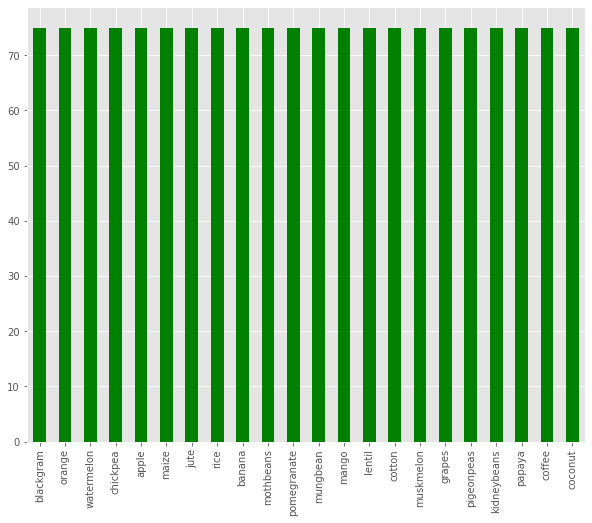

In [9]:
plt.figure(figsize=(10,8))
train_data.crop.value_counts().plot(kind='bar',color='g')
plt.show()

In [10]:
train_data.shape

(1650, 8)

In [11]:
train_data.P

0       136.000000
1        69.000000
2        49.000000
3        35.000000
4        72.000000
           ...    
1645     17.000000
1646     18.000000
1647    135.000000
1648     35.000000
1649     53.221835
Name: P, Length: 1650, dtype: float64

In [12]:
train_data.K

0       196.00000
1        82.00000
2        38.00000
3        28.00000
4        84.00000
          ...    
1645     15.00000
1646     43.00000
1647    199.00000
1648     26.00000
1649     21.55633
Name: K, Length: 1650, dtype: float64

<Figure size 720x576 with 0 Axes>

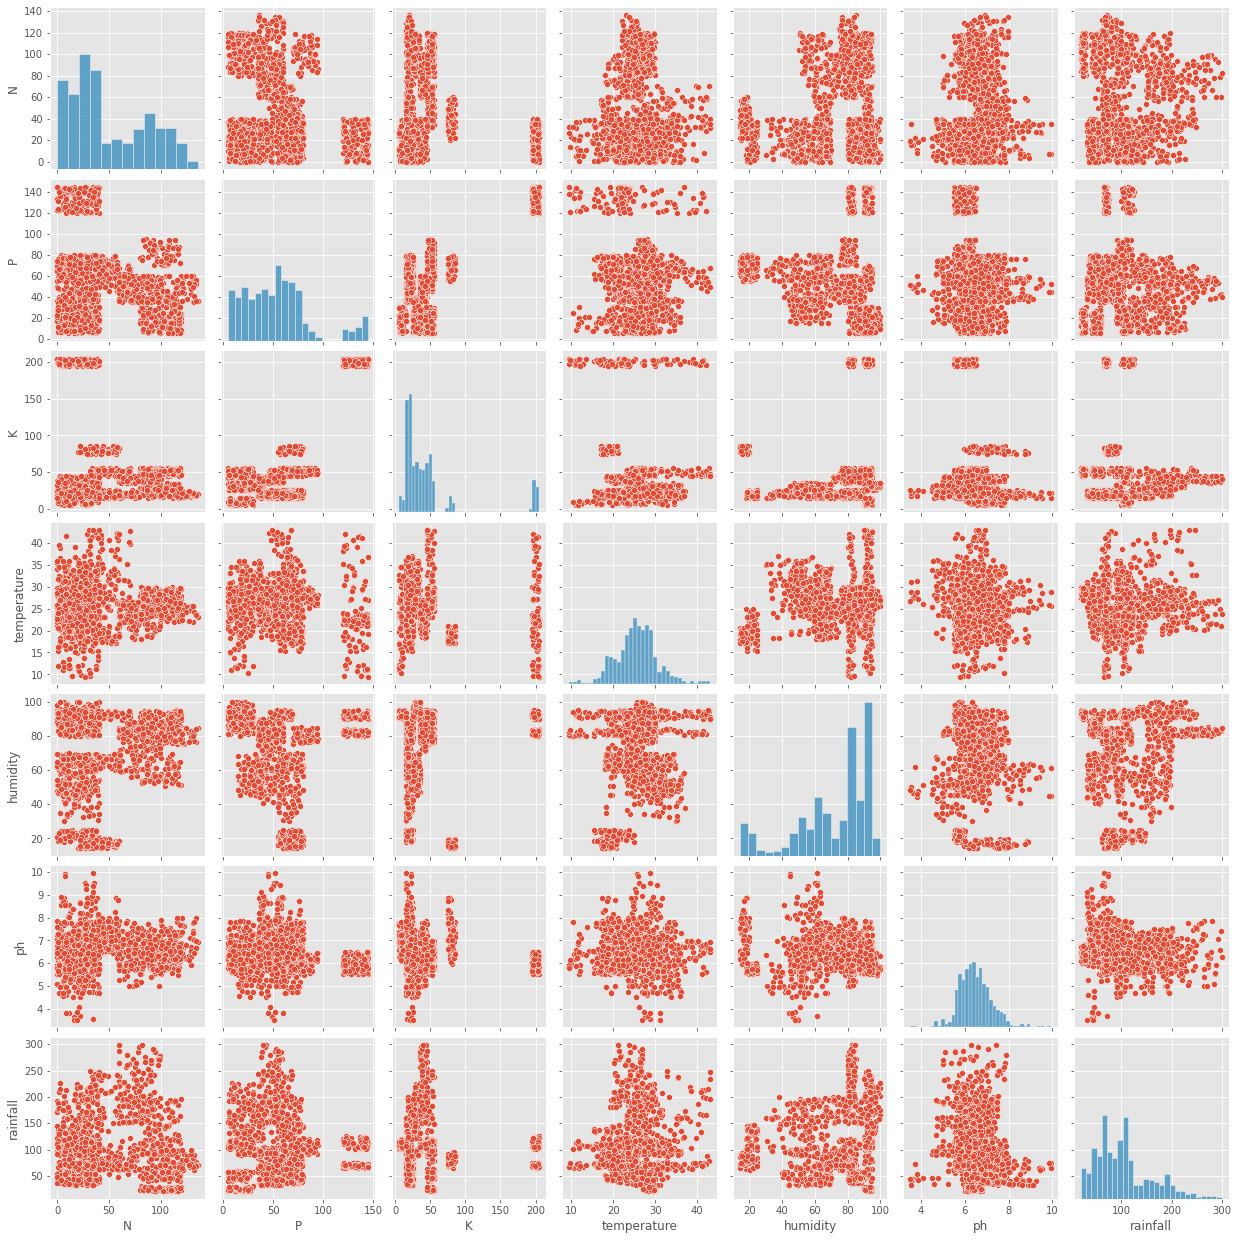

In [13]:
plt.figure(figsize=(10,8))
sns.pairplot(train_data)
plt.show()

In [14]:
le = LabelEncoder()

In [15]:
train_data.crop = le.fit_transform(train_data.crop)
train_data.head()

,N,P,K,temperature,humidity,ph,rainfall,crop
0,17.0,136.0,196.0,23.871923,90.499390,5.882156,103.054809,0
1,49.0,69.0,82.0,18.315615,15.361435,7.263119,81.787105,3
2,74.0,49.0,38.0,23.314104,71.450905,7.488014,164.497037,8
3,104.0,35.0,28.0,27.510061,50.666872,6.983732,143.995555,5
4,23.0,72.0,84.0,19.020613,17.131591,6.920251,79.926981,3


In [16]:
print(le.classes_)

['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


In [38]:
le.inverse_transform(train_data.crop)

array(['apple', 'chickpea', 'jute', ..., 'grapes', 'coffee', 'mungbean'],
      dtype=object)

<Figure size 720x576 with 0 Axes>

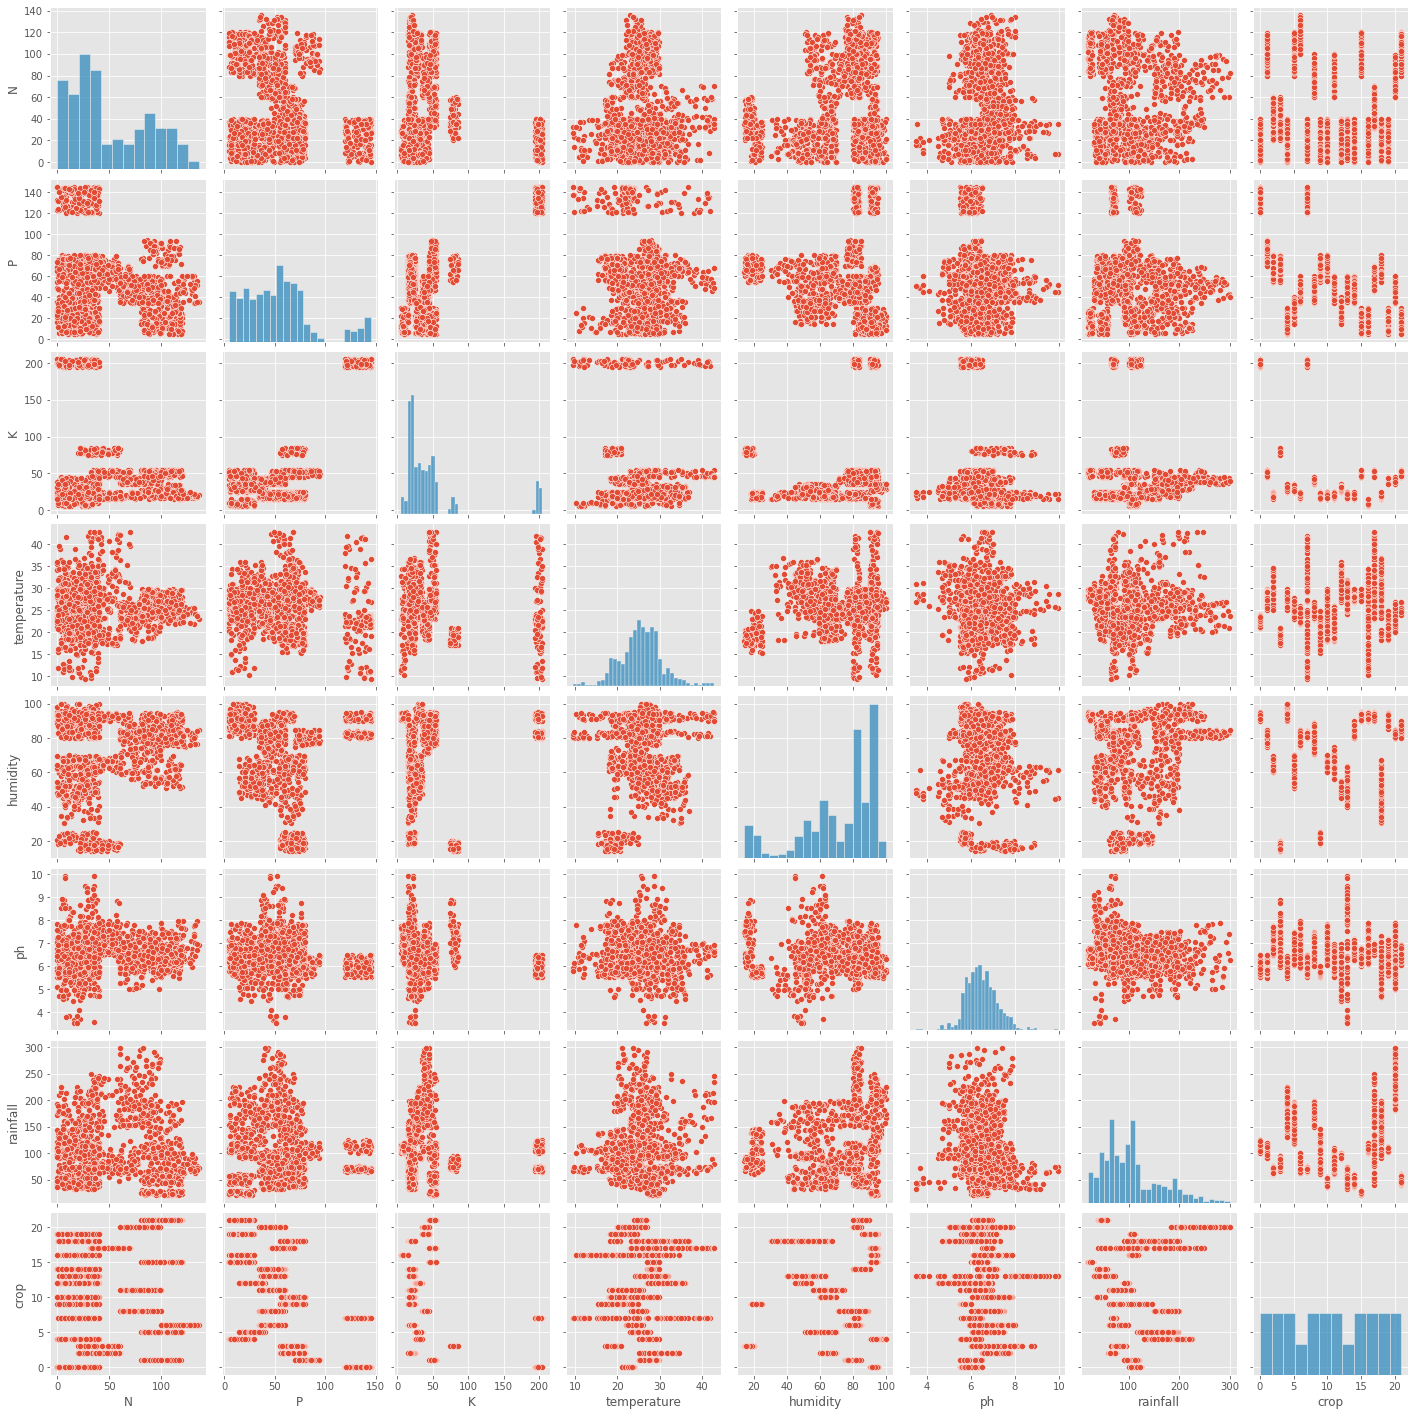

In [17]:
plt.figure(figsize=(10,8))
sns.pairplot(train_data)
plt.show()

### Model Building

In [18]:
train_data.head()

,N,P,K,temperature,humidity,ph,rainfall,crop
0,17.0,136.0,196.0,23.871923,90.499390,5.882156,103.054809,0
1,49.0,69.0,82.0,18.315615,15.361435,7.263119,81.787105,3
2,74.0,49.0,38.0,23.314104,71.450905,7.488014,164.497037,8
3,104.0,35.0,28.0,27.510061,50.666872,6.983732,143.995555,5
4,23.0,72.0,84.0,19.020613,17.131591,6.920251,79.926981,3


In [1]:
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

NameError: name 'train_data' is not defined

In [20]:
sorted(y.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Model Building

In [65]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [66]:
model = Sequential()

In [67]:
model.add(Flatten(input_shape=(7,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(22,activation='softmax'))

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 7)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1024      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 22)                2838      
Total params: 36,886
Trainable params: 36,886
Non-trainable params: 0
_________________________________________________________________


### Compiling the Model

In [69]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [70]:
history = model.fit(X_train,y_train,epochs=100,batch_size=10,validation_split=0.2)

Epoch 1/100
106/106 [==============================] - 0s 3ms/step - loss: 1.8701 - accuracy: 0.6297 - val_loss: 0.6446 - val_accuracy: 0.7917
Epoch 2/100
106/106 [==============================] - 0s 1ms/step - loss: 0.3530 - accuracy: 0.8883 - val_loss: 0.3019 - val_accuracy: 0.8826
Epoch 3/100
106/106 [==============================] - 0s 1ms/step - loss: 0.2628 - accuracy: 0.9129 - val_loss: 0.1847 - val_accuracy: 0.9205
Epoch 4/100
106/106 [==============================] - 0s 2ms/step - loss: 0.2977 - accuracy: 0.9138 - val_loss: 0.2522 - val_accuracy: 0.8939
Epoch 5/100
106/106 [==============================] - 0s 1ms/step - loss: 0.2279 - accuracy: 0.9261 - val_loss: 0.2308 - val_accuracy: 0.9205
Epoch 6/100
106/106 [==============================] - 0s 1ms/step - loss: 0.1504 - accuracy: 0.9536 - val_loss: 0.2471 - val_accuracy: 0.9015
Epoch 7/100
106/106 [==============================] - 0s 1ms/step - loss: 0.2047 - accuracy: 0.9337 - val_loss: 0.1145 - val_accuracy: 0.9545

In [71]:
test_loss,test_acc = model.evaluate(X_test,y_test)

11/11 [==============================] - 0s 1ms/step - loss: 0.1680 - accuracy: 0.9424


In [72]:
prediction = model.predict_classes(test_data)

In [73]:
prediction

array([ 2,  6, 12, 10, 14,  5, 10,  6, 10, 10,  8, 13, 16,  1,  4, 15,  7,
        5, 21, 14,  4, 20, 13, 11,  0, 16, 20, 21, 19, 13,  9, 14,  1, 17,
        2,  3,  9,  4, 10, 17,  7,  7, 20,  3,  7, 18, 21, 18, 21, 12,  6,
       12,  7, 18, 20,  9,  0,  4, 21,  0, 14,  5, 21, 14,  0,  9, 16,  7,
       21,  4, 11, 19,  6,  0, 11,  8, 13,  6,  6, 18, 18,  2,  1,  0,  9,
        6,  1,  3,  0, 11,  7, 16, 19,  2, 21, 13,  7,  0,  3, 16, 16, 15,
        4,  5, 16,  6, 18,  6,  6, 12, 19,  3, 11, 13,  5,  9,  1,  4, 10,
        8,  2,  5,  9, 14,  6, 17, 21,  4, 17,  2,  8,  2, 15, 13, 20, 14,
       19, 18,  5,  5, 12,  8,  8,  6,  3,  3, 17,  2, 16,  0,  5, 14, 11,
        3,  2, 10, 16,  9, 19, 17,  2, 12, 19,  8, 18, 13,  3, 15,  3, 10,
       12,  4,  1,  5, 20, 12, 21, 21,  8,  4, 18, 17, 20, 16,  6,  2, 18,
       12, 12,  2,  8, 16, 17, 11,  6,  6, 17, 15,  0,  5,  4, 21, 15, 15,
        4,  3, 11, 14,  6, 15, 13, 20, 10, 20,  9,  7, 18, 10,  8,  7, 11,
       11, 15, 12, 14,  1

In [74]:
prediction = le.inverse_transform(prediction)
prediction

array(['blackgram', 'cotton', 'mango', 'lentil', 'mungbean', 'coffee',
       'lentil', 'cotton', 'lentil', 'lentil', 'jute', 'mothbeans',
       'orange', 'banana', 'coconut', 'muskmelon', 'grapes', 'coffee',
       'watermelon', 'mungbean', 'coconut', 'rice', 'mothbeans', 'maize',
       'apple', 'orange', 'rice', 'watermelon', 'pomegranate',
       'mothbeans', 'kidneybeans', 'mungbean', 'banana', 'papaya',
       'blackgram', 'chickpea', 'kidneybeans', 'coconut', 'lentil',
       'papaya', 'grapes', 'grapes', 'rice', 'chickpea', 'grapes',
       'pigeonpeas', 'watermelon', 'pigeonpeas', 'watermelon', 'mango',
       'cotton', 'mango', 'grapes', 'pigeonpeas', 'rice', 'kidneybeans',
       'apple', 'coconut', 'watermelon', 'apple', 'mungbean', 'coffee',
       'watermelon', 'mungbean', 'apple', 'kidneybeans', 'orange',
       'grapes', 'watermelon', 'coconut', 'maize', 'pomegranate',
       'cotton', 'apple', 'maize', 'jute', 'mothbeans', 'cotton',
       'cotton', 'pigeonpeas', 'pig

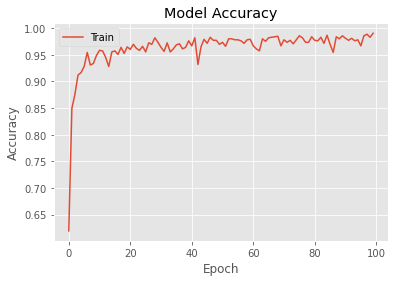

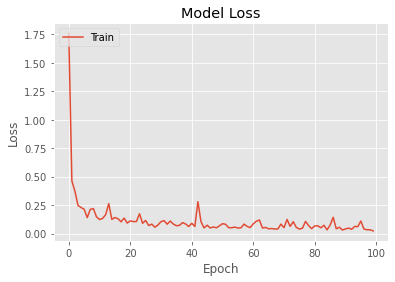

In [33]:
### Plot training and Validation Accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc='upper left')
plt.show()

### Plot training and Validation Loss values
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc='upper left')
plt.show()

In [77]:
res = pd.DataFrame(prediction)
res.columns = ["prediction"]
res.to_csv("submission.csv",index = False)

In [78]:
submission = pd.read_csv("submission.csv")
submission

,prediction
0,blackgram
1,cotton
2,mango
3,lentil
4,mungbean
...,...
545,chickpea
546,coconut
547,coconut
548,apple
